In [106]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
from functools import reduce
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [107]:
# Read data (output from FReDA_Touch_genVariables_final.do)
df = pd.read_excel('source/only_couples_data.xlsx')

In [108]:
# Variables to map columns
index_options = {
    '0x': 0,
    '1-5x': 3,
    '6-10x': 8,
    '11-20x': 15,
    '21-50x': 35,
    '> 50x': 60
}

omo_options = {
    'Not at all': 0,
    '1 to 5 times': 3,
    '6 to 10 times': 8,
    '11 to 20 times': 15,
    '21 to 50 times': 35,
    'More than 50 times': 60
}

satisfaction_options = {
    '0 - Not at all satisfied': 3,
    1: 3,
    2: 3,
    3: 3,
    4: 6,
    5: 6,
    6: 6,
    7: 6,
    8: 10,
    9: 10,
    '10 - Completely satisfied': 10
}

duration_options = {
    '0-2': 1,
    '3-5': 4,
    '6-10': 8,
    '11-20': 15,
    '21+': 25,
}

rename_columns = {
    'omo15i1_w2b': 'Anchor kiss (given)',
    'omo15i2_w2b': 'Anchor kiss (desired)',
    'pomo15i1_w2b': 'Partner kiss (given)',
    'pomo15i2_w2b': 'Partner kiss (desired)',
    'omo16i1_w2b': 'Anchor hold (given)',
    'omo16i2_w2b': 'Anchor hold (desired)',
    'pomo16i1_w2b': 'Partner hold (given)',
    'pomo16i2_w2b': 'Partner hold (desired)',
    'omo17i1_w2b': 'Anchor intimacy (given)',
    'omo17i2_w2b': 'Anchor intimacy (desired)',
    'pomo17i1_w2b': 'Partner intimacy (given)',
    'pomo17i2_w2b': 'Partner intimacy (desired)',
    'relsat': 'Anchor relationship satisfaction',
    'relint': 'Anchor life satisfaction',
    'prelsat': 'Partner relationship satisfaction',
    'prelint': 'Partner life satisfaction'
}

In [109]:
# Rename some columns to ease understanding
df = df.rename(
    columns=rename_columns
)

# Map target columns
# This will change categorical values such as '0-2' or '3-5' to numerical values: 1,2,3,etc...
df['kiss_discrepancy(Anchor)'] = None
df['hold_discrepancy(Anchor)'] = None
df['hug_discrepancy(Anchor)'] = None
df['kiss_discrepancy(Partner)'] = None
df['hold_discrepancy(Partner)'] = None
df['hug_discrepancy(Partner)'] = None

df['Anchor relationship satisfaction'] = df['Anchor relationship satisfaction'].map(satisfaction_options)
df['Partner relationship satisfaction'] = df['Partner relationship satisfaction'].map(satisfaction_options)

df['tf_kiss'] = df['tf_kiss'].map(index_options)
df['ptf_kiss'] = df['ptf_kiss'].map(index_options)
df['tf_hold'] = df['tf_hold'].map(index_options)
df['ptf_hold'] = df['ptf_hold'].map(index_options)
df['tf_hug'] = df['tf_hug'].map(index_options)
df['ptf_hug'] = df['ptf_hug'].map(index_options)

df['Anchor kiss (given)'] = df['Anchor kiss (given)'].map(omo_options)
df['Anchor hold (given)'] = df['Anchor hold (given)'].map(omo_options)
df['Anchor intimacy (given)'] = df['Anchor intimacy (given)'].map(omo_options)
df['Anchor kiss (desired)'] = df['Anchor kiss (desired)'].map(omo_options)
df['Anchor hold (desired)'] = df['Anchor hold (desired)'].map(omo_options)
df['Anchor intimacy (desired)'] = df['Anchor intimacy (desired)'].map(omo_options)

df['Partner kiss (given)'] = df['Partner kiss (given)'].map(omo_options)
df['Partner hold (given)'] = df['Partner hold (given)'].map(omo_options)
df['Partner intimacy (given)'] = df['Partner intimacy (given)'].map(omo_options)
df['Partner kiss (desired)'] = df['Partner kiss (desired)'].map(omo_options)
df['Partner hold (desired)'] = df['Partner hold (desired)'].map(omo_options)
df['Partner intimacy (desired)'] = df['Partner intimacy (desired)'].map(omo_options)

df['Relationship length'] = df['reldur_class'].map(duration_options)

In [110]:
# Group anchor and partner by age
for i in range(0, len(df)):
    if df['age'][i] <= 20:
        df.loc[i, 'age-group(anchor)'] = '<21'
    elif 20 < df['age'][i] <= 30:
        df.loc[i, 'age-group(anchor)'] = '21-30'
    elif 30 < df['age'][i] <= 40:
        df.loc[i, 'age-group(anchor)'] = '31-40'
    elif 40 < df['age'][i] <= 50:
        df.loc[i, 'age-group(anchor)'] = '41-50'
    elif 50 < df['age'][i]:
        df.loc[i, 'age-group(anchor)'] = '>50'

for i in range(0, len(df)):
    if df['page'][i] <= 20:
        df.loc[i, 'age-group(partner)'] = '<21'
    elif 20 < df['age'][i] <= 30:
        df.loc[i, 'age-group(partner)'] = '21-30'
    elif 30 < df['age'][i] <= 40:
        df.loc[i, 'age-group(partner)'] = '31-40'
    elif 40 < df['age'][i] <= 50:
        df.loc[i, 'age-group(partner)'] = '41-50'
    elif 50 < df['age'][i]:
        df.loc[i, 'age-group(partner)'] = '>50'

Compare Anchor and Partner. 
Find if there is any discrepancy between the reported frequency (kiss, pat, hug)
1. Anchor reported - Partner desire
2. Partner reported - Anchor desire

In [111]:
for i in range(0, len(df)):
    df.loc[i, 'kiss_discrepancy(Anchor)'] = df['Anchor kiss (given)'][i] - df['Partner kiss (desired)'][i]
    df.loc[i, 'hold_discrepancy(Anchor)'] = df['Anchor hold (given)'][i] - df['Partner hold (desired)'][i]
    df.loc[i, 'hug_discrepancy(Anchor)'] = df['Anchor intimacy (given)'][i] - df['Partner intimacy (desired)'][i]

    df.loc[i, 'kiss_discrepancy(Partner)'] = df['Partner kiss (given)'][i] - df['Anchor kiss (desired)'][i]
    df.loc[i, 'hold_discrepancy(Partner)'] = df['Partner hold (given)'][i] - df['Anchor hold (desired)'][i]
    df.loc[i, 'hug_discrepancy(Partner)'] = df['Partner intimacy (given)'][i] - df['Anchor intimacy (desired)'][i]

Start with some descriptive statistics, including a Correlation Matrix

In [112]:
# delete those with no relationship duration data
df = df[df['reldur_class'] != '.']

In [113]:
# Calculate means for touch variables
# anchor_kiss_reported = df.groupby('age-group(anchor)')['Anchor kiss (given)'].mean().reset_index()
# anchor_hold_reported = df.groupby('age-group(anchor)')['Anchor hold (given)'].mean().reset_index()
# anchor_hug_reported = df.groupby('age-group(anchor)')['Anchor intimacy (given)'].mean().reset_index()
#
# partner_kiss_reported = df.groupby('age-group(partner)')['Partner kiss (given)'].mean().reset_index()
# partner_hold_reported = df.groupby('age-group(partner)')['Partner hold (given)'].mean().reset_index()
# partner_hug_reported = df.groupby('age-group(partner)')['Partner intimacy (given)'].mean().reset_index()
#
# anchor_kiss_desired = df.groupby('age-group(anchor)')['Anchor kiss (desired)'].mean().reset_index()
# anchor_hold_desired = df.groupby('age-group(anchor)')['Anchor hold (desired)'].mean().reset_index()
# anchor_hug_desired = df.groupby('age-group(anchor)')['Anchor intimacy (desired)'].mean().reset_index()
#
# partner_kiss_desired = df.groupby('age-group(partner)')['Partner kiss (desired)'].mean().reset_index()
# partner_hold_desired = df.groupby('age-group(partner)')['Partner hold (desired)'].mean().reset_index()
# partner_hug_desired = df.groupby('age-group(partner)')['Partner intimacy (desired)'].mean().reset_index()

anchor_kiss_reported = df.groupby('age')['Anchor kiss (given)'].mean().reset_index()
anchor_hold_reported = df.groupby('age')['Anchor hold (given)'].mean().reset_index()
anchor_hug_reported = df.groupby('age')['Anchor intimacy (given)'].mean().reset_index()

partner_kiss_reported = df.groupby('age')['Partner kiss (given)'].mean().reset_index()
partner_hold_reported = df.groupby('age')['Partner hold (given)'].mean().reset_index()
partner_hug_reported = df.groupby('age')['Partner intimacy (given)'].mean().reset_index()

anchor_kiss_desired = df.groupby('age')['Anchor kiss (desired)'].mean().reset_index()
anchor_hold_desired = df.groupby('age')['Anchor hold (desired)'].mean().reset_index()
anchor_hug_desired = df.groupby('age')['Anchor intimacy (desired)'].mean().reset_index()

partner_kiss_desired = df.groupby('age')['Partner kiss (desired)'].mean().reset_index()
partner_hold_desired = df.groupby('age')['Partner hold (desired)'].mean().reset_index()
partner_hug_desired = df.groupby('age')['Partner intimacy (desired)'].mean().reset_index()

In [114]:
# Plot means
dataframes_anchor = [
    anchor_kiss_reported, anchor_hold_reported, anchor_hug_reported,
    anchor_kiss_desired, anchor_hold_desired, anchor_hug_desired,
]

dataframes_partner = [
    partner_kiss_reported, partner_hold_reported, partner_hug_reported,
    partner_kiss_desired, partner_hold_desired, partner_hug_desired
]

# df_merged_anchor = reduce(lambda left, right: pd.merge(left, right, on=['age-group(anchor)'],
#                                                        how='outer'), dataframes_anchor)
#
# df_merged_partner = reduce(lambda left, right: pd.merge(left, right, on=['age-group(partner)'],
#                                                         how='outer'), dataframes_partner)

df_merged_anchor = reduce(lambda left, right: pd.merge(left, right, on=['age'],
                                                       how='outer'), dataframes_anchor)

df_merged_partner = reduce(lambda left, right: pd.merge(left, right, on=['age'],
                                                        how='outer'), dataframes_partner)

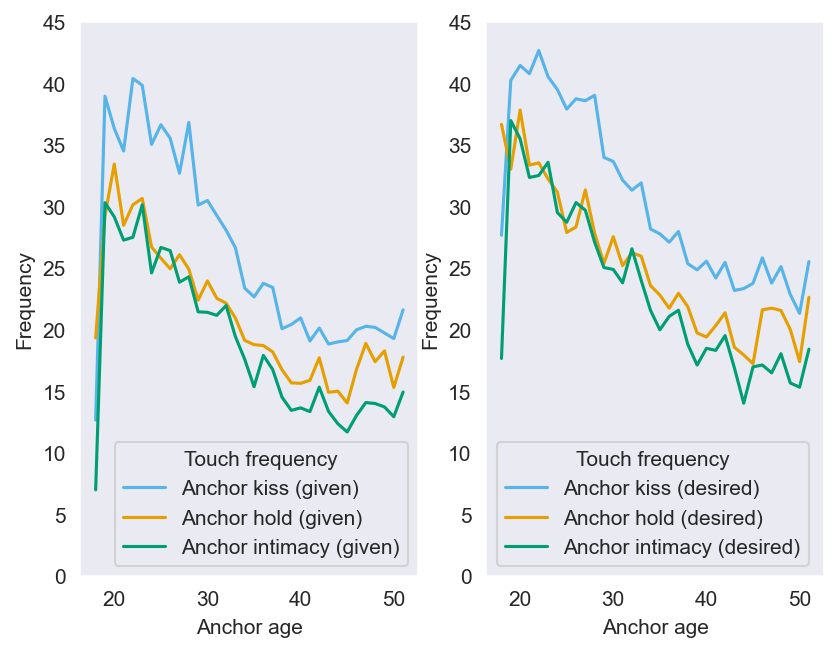

In [115]:
fig, ax = plt.subplots(1, 2)
df_melted = df_merged_anchor.melt(id_vars='age',
                                  value_vars=['Anchor kiss (given)', 'Anchor hold (given)',
                                              'Anchor intimacy (given)'],
                                  var_name='Touch frequency', value_name='Value')

sns.lineplot(data=df_melted,
             x='age',
             y='Value',
             hue='Touch frequency',
             palette=["#56B4E9", "#E69F00", "#009E73"],
             ax=ax[0]
             )

df_melted = df_merged_anchor.melt(id_vars='age',
                                  value_vars=['Anchor kiss (desired)', 'Anchor hold (desired)',
                                              'Anchor intimacy (desired)'],
                                  var_name='Touch frequency', value_name='Value')

sns.lineplot(data=df_melted,
             x='age',
             y='Value',
             hue='Touch frequency',
             palette=["#56B4E9", "#E69F00", "#009E73"],
             ax=ax[1],
             )

ax[0].set_ylim(0, 45), ax[0].set_xlabel("Anchor age"), ax[0].set_ylabel("Frequency"), ax[0].grid(False)
ax[1].set_ylim(0, 45), ax[1].set_xlabel("Anchor age"), ax[1].set_ylabel("Frequency"), ax[1].grid(False)
fig.set_dpi(150)

plt.show()

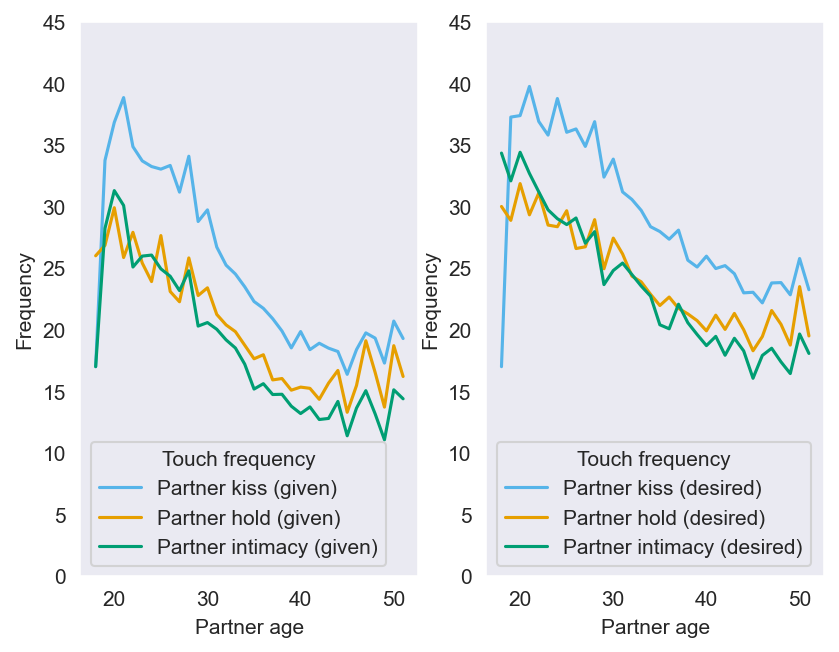

In [116]:
fig, ax = plt.subplots(1, 2)
df_melted = df_merged_partner.melt(id_vars='age',
                                   value_vars=['Partner kiss (given)', 'Partner hold (given)',
                                               'Partner intimacy (given)'],
                                   var_name='Touch frequency', value_name='Value')

sns.lineplot(data=df_melted,
             x='age',
             y='Value',
             hue='Touch frequency',
             palette=["#56B4E9", "#E69F00", "#009E73"],
             ax=ax[0]
             )

df_melted = df_merged_partner.melt(id_vars='age',
                                   value_vars=['Partner kiss (desired)', 'Partner hold (desired)',
                                               'Partner intimacy (desired)'],
                                   var_name='Touch frequency', value_name='Value')

sns.lineplot(data=df_melted,
             x='age',
             y='Value',
             hue='Touch frequency',
             palette=["#56B4E9", "#E69F00", "#009E73"],
             ax=ax[1],
             )

ax[0].set_ylim(0, 45), ax[0].set_xlabel("Partner age"), ax[0].set_ylabel("Frequency"), ax[0].grid(False)
ax[1].set_ylim(0, 45), ax[1].set_xlabel("Partner age"), ax[1].set_ylabel("Frequency"), ax[1].grid(False)
fig.set_dpi(150)
plt.show()

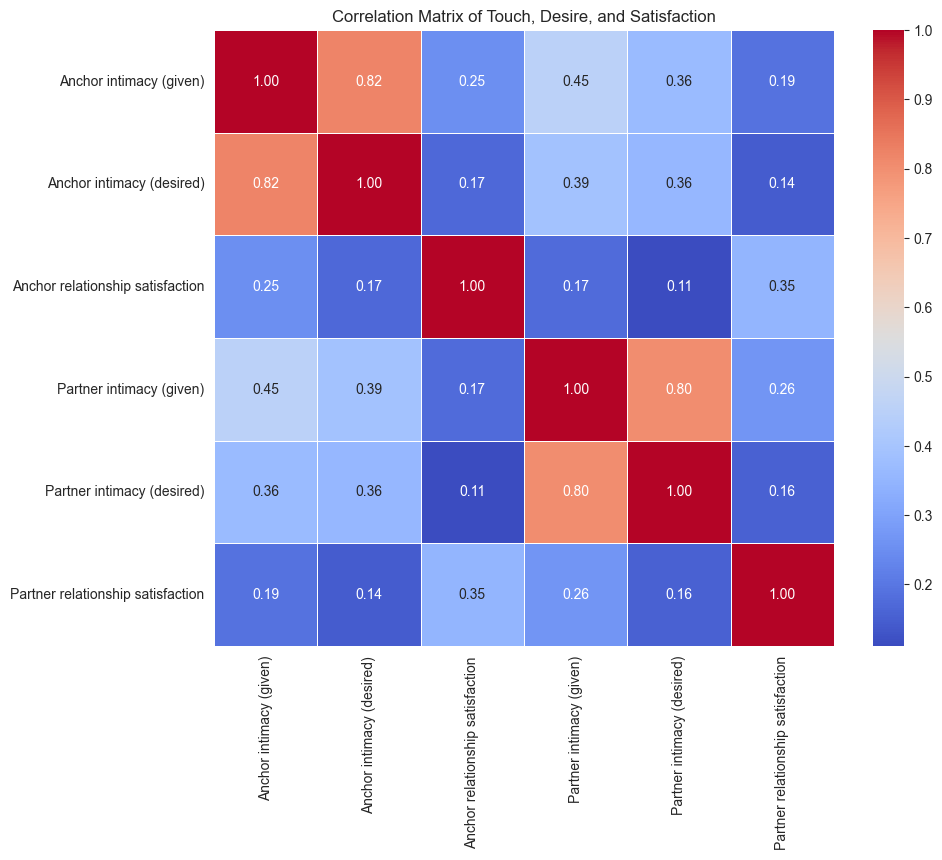

In [117]:
correlation_matrix = df[
    [
        'Anchor intimacy (given)', 'Anchor intimacy (desired)',
        'Anchor relationship satisfaction',
        'Partner intimacy (given)', 'Partner intimacy (desired)',
        'Partner relationship satisfaction',
    ]
].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Touch, Desire, and Satisfaction')
plt.show()

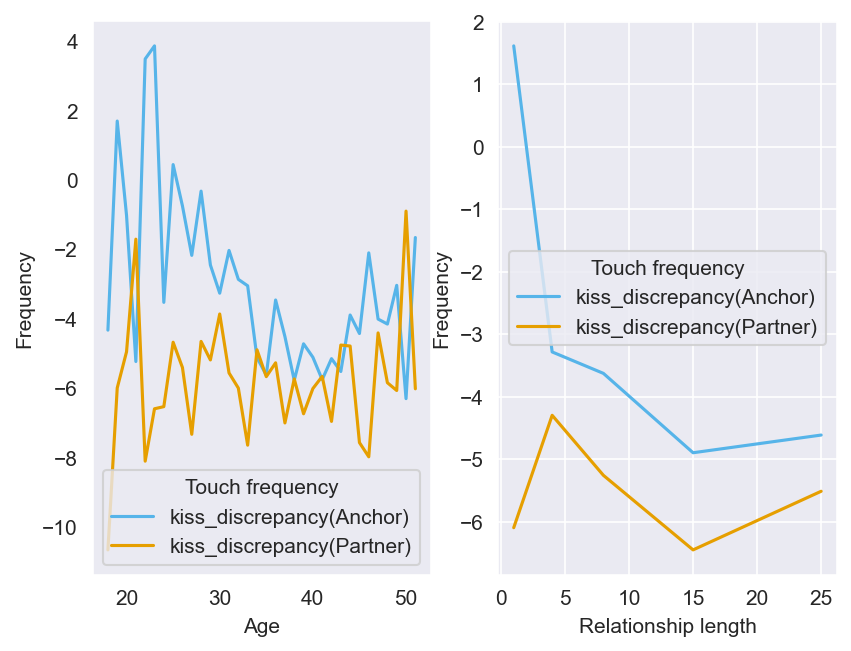

In [122]:
df_kiss = df
anchor_kiss = df_kiss.groupby('age')['kiss_discrepancy(Anchor)'].mean().reset_index()
partner_kiss = df_kiss.groupby('age')['kiss_discrepancy(Partner)'].mean().reset_index()

anchor_kiss_len = df_kiss.groupby('Relationship length')['kiss_discrepancy(Anchor)'].mean().reset_index()
partner_kiss_len = df_kiss.groupby('Relationship length')['kiss_discrepancy(Partner)'].mean().reset_index()

merge_kiss = reduce(lambda left, right: pd.merge(left, right, on=['age'],
                                                 how='outer'), [anchor_kiss, partner_kiss])

merge_kiss_len = reduce(lambda left, right: pd.merge(left, right, on=['Relationship length'],
                                                     how='outer'), [anchor_kiss_len, partner_kiss_len])

melt_kiss = merge_kiss.melt(id_vars='age',
                            value_vars=['kiss_discrepancy(Anchor)', 'kiss_discrepancy(Partner)'],
                            var_name='Touch frequency', value_name='Value')

melt_kiss_len = merge_kiss_len.melt(id_vars='Relationship length',
                                    value_vars=['kiss_discrepancy(Anchor)', 'kiss_discrepancy(Partner)'],
                                    var_name='Touch frequency', value_name='Value')

fig, ax = plt.subplots(1, 2)
sns.lineplot(data=melt_kiss,
             x='age',
             y='Value',
             hue='Touch frequency',
             palette=["#56B4E9", "#E69F00"],
             ax=ax[0]
             )

sns.lineplot(data=melt_kiss_len,
             x='Relationship length',
             y='Value',
             hue='Touch frequency',
             palette=["#56B4E9", "#E69F00"],
             ax=ax[1]
             )

ax[0].set_xlabel('Age'), ax[0].set_ylabel('Frequency'), ax[0].grid(False)
ax[1].set_xlabel('Relationship length'), ax[1].set_ylabel('Frequency'), ax[1].grid(True), ax[1].set_xticks([0,5,10,15,20,25])
fig.set_dpi(150)
plt.show()